<a href="https://colab.research.google.com/github/Snehalatha10/Snehalatha-Prakash/blob/main/Iris_Classification_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [3]:
df=pd.read_csv('/content/Irisdataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#find the number of species
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#handling categorical values
#convert categorical values to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
#check different types of classes in Species
species_name=label_encoder.classes_
print(species_name)

[0 1 2]


In [13]:
X=df.drop(columns=['Id','Species'])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y=df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, shuffle=True, random_state=69)

In [16]:
X_train.shape

(105, 4)

In [17]:
#scale the datasets
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
#create a binary matrix and tokenize those
y_train=keras.utils.to_categorical(y_train, num_classes=3)
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [22]:
model=Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[-1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [24]:
#when there are multiple values use categorical crossentropy
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                160       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 1.0914 - accuracy: 0.3810 - 933ms/epoch - 233ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0621 - accuracy: 0.3905 - 20ms/epoch - 5ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9814 - accuracy: 0.5429 - 18ms/epoch - 5ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9693 - accuracy: 0.5238 - 16ms/epoch - 4ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9547 - accuracy: 0.5524 - 15ms/epoch - 4ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8739 - accuracy: 0.6857 - 14ms/epoch - 4ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8986 - accuracy: 0.6381 - 15ms/epoch - 4ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8683 - accuracy: 0.6286 - 15ms/epoch - 4ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8105 - accuracy: 0.7619 - 15ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8298 - accuracy: 0.7714 - 15ms/epoch - 4ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7900 - accuracy: 0.7333 - 15ms/epoch - 4ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7559 - accuracy: 0.8000 - 16ms/epoch - 4ms/step
Epoch 13/100
4/4 - 0s - loss: 0.7584 - accurac

In [26]:
#predictions
pred=model.predict(X_test)
pred

2/2 [==============================] - 0s 11ms/step


array([[9.99967515e-01, 2.80275999e-05, 4.35413267e-06],
       [4.62980522e-03, 9.45323765e-01, 5.00463769e-02],
       [9.99757051e-01, 2.23436728e-04, 1.94616678e-05],
       [4.90121311e-04, 9.09618475e-03, 9.90413666e-01],
       [9.99657035e-01, 3.08321207e-04, 3.47209243e-05],
       [9.99991596e-01, 7.62343507e-06, 6.77932803e-07],
       [1.01837181e-02, 9.40690994e-01, 4.91251983e-02],
       [2.49655044e-04, 1.47911916e-02, 9.84959185e-01],
       [1.58299971e-03, 3.86636555e-01, 6.11780405e-01],
       [9.99994338e-01, 4.98153713e-06, 5.93749064e-07],
       [6.98378368e-04, 8.19991529e-01, 1.79310128e-01],
       [6.03419030e-05, 8.19202513e-03, 9.91747618e-01],
       [9.99781370e-01, 1.99497110e-04, 1.90324899e-05],
       [9.99045074e-02, 7.38783181e-01, 1.61312416e-01],
       [4.71543201e-04, 1.24512222e-02, 9.87077296e-01],
       [6.09854516e-03, 9.52776074e-01, 4.11254354e-02],
       [3.15518514e-03, 9.90332305e-01, 6.51249010e-03],
       [4.19100863e-04, 1.04409

In [28]:
pred=np.argmax(pred, axis=-1)
pred

array([0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0,
       1])

In [29]:
y_test

4      0
58     1
20     0
114    2
31     0
33     0
94     1
102    2
129    2
32     0
119    2
105    2
8      0
85     1
145    2
73     1
81     1
104    2
95     1
113    2
100    2
67     1
34     0
10     0
125    2
36     0
136    2
143    2
59     1
17     0
47     0
42     0
19     0
127    2
118    2
120    2
13     0
66     1
50     1
149    2
15     0
115    2
84     1
30     0
52     1
Name: Species, dtype: int64

In [31]:
#confusion matrix
cm=confusion_matrix(y_test,pred)
cm

array([[16,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 16]])

<Axes: >

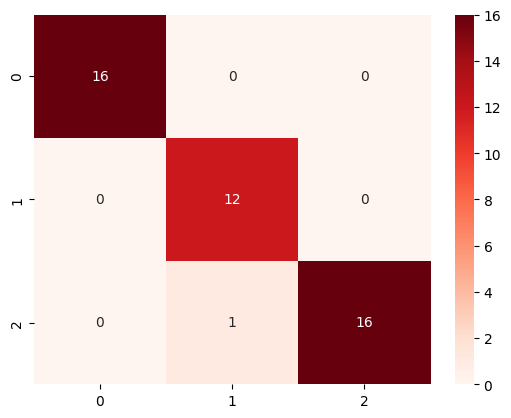

In [34]:
#heatmap
heatmap=sns.heatmap(cm, annot=True, fmt='d',cmap='Reds')
heatmap

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, pred)

0.9777777777777777